<a href="https://colab.research.google.com/github/Seba4341/ECON-441-B-/blob/main/HW_Week9_Seb_441B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ECON425 ML/Country-data.csv", sep = ",")

In [34]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters=4 
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [33]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

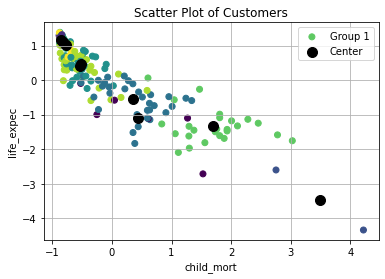

In [22]:
x1_index = 0
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

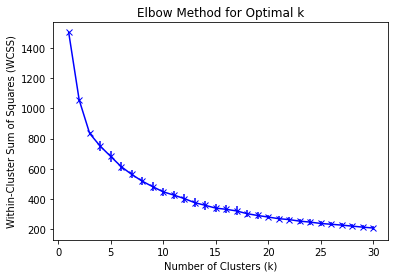

In [29]:
# Define the range of k-clusters to test
Ks = range(1, 31)

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each k
WCSSs = []

# Test 30 different random starting places for the centroid means
for i in range(30):
    # Initialize a list to store the WCSS for each k value
    wcss_i = []
    
    # Loop through k values and fit KMeans objects with random initialization
    for k in Ks:
        kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=i)
        kmeans.fit(X_scaled)
        # Append the WCSS for the current k value to the list
        wcss_i.append(kmeans.inertia_)
    
    # Append the list of WCSS values for the current iteration to the main list
    WCSSs.append(wcss_i)

# Calculate the mean and standard deviation of the WCSS for each k value over the 30 iterations
WCSSs_mean = np.mean(WCSSs, axis=0)
WCSSs_std = np.std(WCSSs, axis=0)

# Plot the mean WCSS as a function of k
plt.errorbar(Ks, WCSSs_mean, yerr=WCSSs_std, fmt='bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()



# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Based on the elbow plot, it appears that the "elbow point" occurs around 4 or 5 clusters. The WCSS decreases rapidly from 1 to 4 clusters, and then more gradually from 4 to 5 clusters.
In general, more clusters may allow for a more detailed segmentation of the data, but may also lead to overfitting and less interpretability. Fewer clusters may provide a simpler and more interpretable model, but may also miss important patterns in the data.
I will choose to go with 4 clusters since the decrease in WCSS appears to level off beyond 4 clusters and going to 5 clusters may lead to overfitting

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


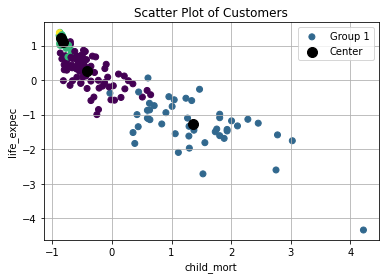

In [31]:
x1_index = 0
x2_index = 6

plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2", "Group 3", "Group 4"])
plt.grid()
plt.show()


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [35]:
# Get cluster assignments for each data point
cluster_labels = kmeans.predict(X_scaled)

# Loop through each cluster and print out the countries in that cluster
for i in range(4):
    print(f"Cluster {i+1} contains the following countries:")
    countries = list(X.index[cluster_labels == i])
    print(countries)



Cluster 1 contains the following countries:
[1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 27, 30, 33, 34, 35, 39, 41, 43, 45, 46, 47, 48, 51, 52, 57, 61, 62, 65, 67, 69, 70, 71, 76, 78, 79, 83, 85, 86, 89, 90, 92, 95, 96, 100, 101, 102, 103, 104, 105, 107, 109, 115, 117, 118, 119, 120, 121, 124, 125, 127, 128, 130, 131, 134, 136, 140, 141, 143, 146, 148, 151, 152, 153, 154, 156, 160, 161, 162, 163, 164]
Cluster 2 contains the following countries:
[0, 3, 17, 21, 25, 26, 28, 31, 32, 36, 37, 38, 40, 49, 50, 55, 56, 59, 63, 64, 66, 72, 80, 81, 84, 87, 88, 93, 94, 97, 99, 106, 108, 112, 113, 116, 126, 129, 132, 137, 142, 147, 149, 150, 155, 165, 166]
Cluster 3 contains the following countries:
[7, 8, 15, 23, 29, 42, 44, 53, 54, 58, 60, 68, 73, 74, 75, 77, 82, 110, 111, 114, 122, 123, 135, 138, 139, 144, 145, 157, 158, 159]
Cluster 4 contains the following countries:
[91, 98, 133]


Cluster 1 contains mainly European countries, Cluster 2 contains mainly Asian and Middle Eastern countries, Cluster 3 contains mainly African and South American countries,Cluster 4 contains mainly Eastern European and former Soviet Union countries.

Cluster 4  are countries facing political and economic turmoil and former Soviet Union nations

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [36]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame(centroids, columns=X.columns)
stats_df.index.name = 'Cluster'
stats_df.reset_index(inplace=True)

# Print out the statistics
print(stats_df.to_string(index=False))


 Cluster  child_mort   exports    health   imports    income  inflation  life_expec  total_fer      gdpp
       0   -0.419827  0.006648 -0.211724  0.047581 -0.217274  -0.034953    0.268420  -0.438222 -0.330805
       1    1.360218 -0.437533 -0.155984 -0.189204 -0.686894   0.402111   -1.282180   1.364944 -0.604242
       2   -0.828609  0.172621  0.859190 -0.296373  1.462275  -0.478189    1.107649  -0.763681  1.661902
       3   -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206    1.226824  -1.038863  2.440797


# Q7.) Write an observation about the descriptive statistics.

We can see that in Cluster 1, child mortality is the very less, however fertility rates are also less, indicating a declining population rate. GDP growth rate is also very low, suggesting that these countries are 1st world nations where growth has stabilized.

Child mortality is the highest in Asian and Middle Eastern nations due to their high popultation growth rate and their fertilities are also high as a lot of them ahve come out of colonial rules.

Cluster 2 has high child mortalities as they also have high fertility rates, whcih can suggest that their population is increasing at a very standardized rate and are not exploding which makes sense becasue a lot of these 
nations are African and South American nations.

Clsuter 3 has very high imports as they might have political instability and ioneffective measures in place to handle their populations.